# Modeling the Central Dogma in E. coli: A Systems Biology Approach
#### _"Tout ce qui est vrai pour le Colibacille est vrai pour l’éléphant"_ - J. Monod

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt

## Model of the Central Dogma 
To construct a simple model of the central dogma in E. coli, we summarize the key numerical values reported in the file named _Magnati_Project_Central_Dogma_:


| Parameter | Approximate Value | Units |
|-----------|-----------|-----------|
| RNAP Speed  | 40-80  | nt/sec |
| Ribosome Speed  | 20  | aa/sec  |
| mRNA lifetime  | 3-8 | min  |
| Cell Cycle  | 30 | min |
| Protein-mRNA ratio  | 1000  | -  |
| Proteins synthesized from single mRNA  | 10-100  | - |

Specifically, let's assume we want to model the central dogma of an E. coli gene such as LacZ. LacZ encodes for the enzyme β-galactosidase which plays a key role in breaking down lactose into glucose and galactose. It is part of the lac operon, a regulatory system in bacteria that controls the metabolism of lactose: when lactose is present, LacZ is expressed and produces β-galactosidase, allowing the cell to use lactose as a carbon source.
The LacZ gene size is about 3075 base pairs while the protein contains 1021 amino acid residues (about one third of nucleotides as we expected).
The mRNA for LacZ is typically short-lived in E. coli, with a half-life of around 3-8 minutes, while the β-galactosidase protein is relatively more stable, with a half-life of about 20 hours.

These value are used to set the parameters as follows:

In [2]:
# Define parameters
length = 1024  # amino acids
max_speed_pol = 80  # nt/sec
max_speed_rib = 20  # aa/sec
'''I used the approximation of 1 amino acid = 3 nucleotides 
and hypothesized that the number of polysomes is around 10-20'''
rib_per_mrna = 15  # average number of ribosomes per mRNA
mrna_lifetime = 3 * 60  # (3 min converted to sec)
cell_cycle = 30 * 60  # passive degradation (30 min converted to sec)

A basic mathematical model describing mRNA levels in E. coli can be written as:
$$\dot{m} = k - \gamma m(t)$$

A simple model describing the time evolution of protein levels can be written as:
$$\dot{p}=\alpha m(t)-\beta p(t)$$

In [3]:
# Compute times
time_transcription = length * 3 / max_speed_pol  # sec
time_translation = length / max_speed_rib  # sec

# mRNA variables
k = 1 / time_transcription
gamma = np.log(2) / mrna_lifetime

# Protein variables
alfa = rib_per_mrna * (1 / time_translation)  # Adjusted translation rate
beta = np.log(2) / cell_cycle

The solution of these two differential equations are:

In [4]:
# Time range
tmax = 10000  # seconds (i.e. t -> infty)
dt = 0.1
t = np.arange(0, tmax, dt)

# Compute solutions
m = k / gamma * (1 - np.exp(-gamma * t))
p = k * alfa / gamma * (
    1 / beta * (1 - np.exp(-beta * t)) - 
    1 / (beta - gamma) * (np.exp(-gamma * t) - np.exp(-beta * t))
)

## Plot the model

Steady-state mRNA: 6.76
Steady-state protein: 5144.99
Steady-state Protein/mRNA ratio: 760.80
Proteins produced per mRNA before degradation: 76.08


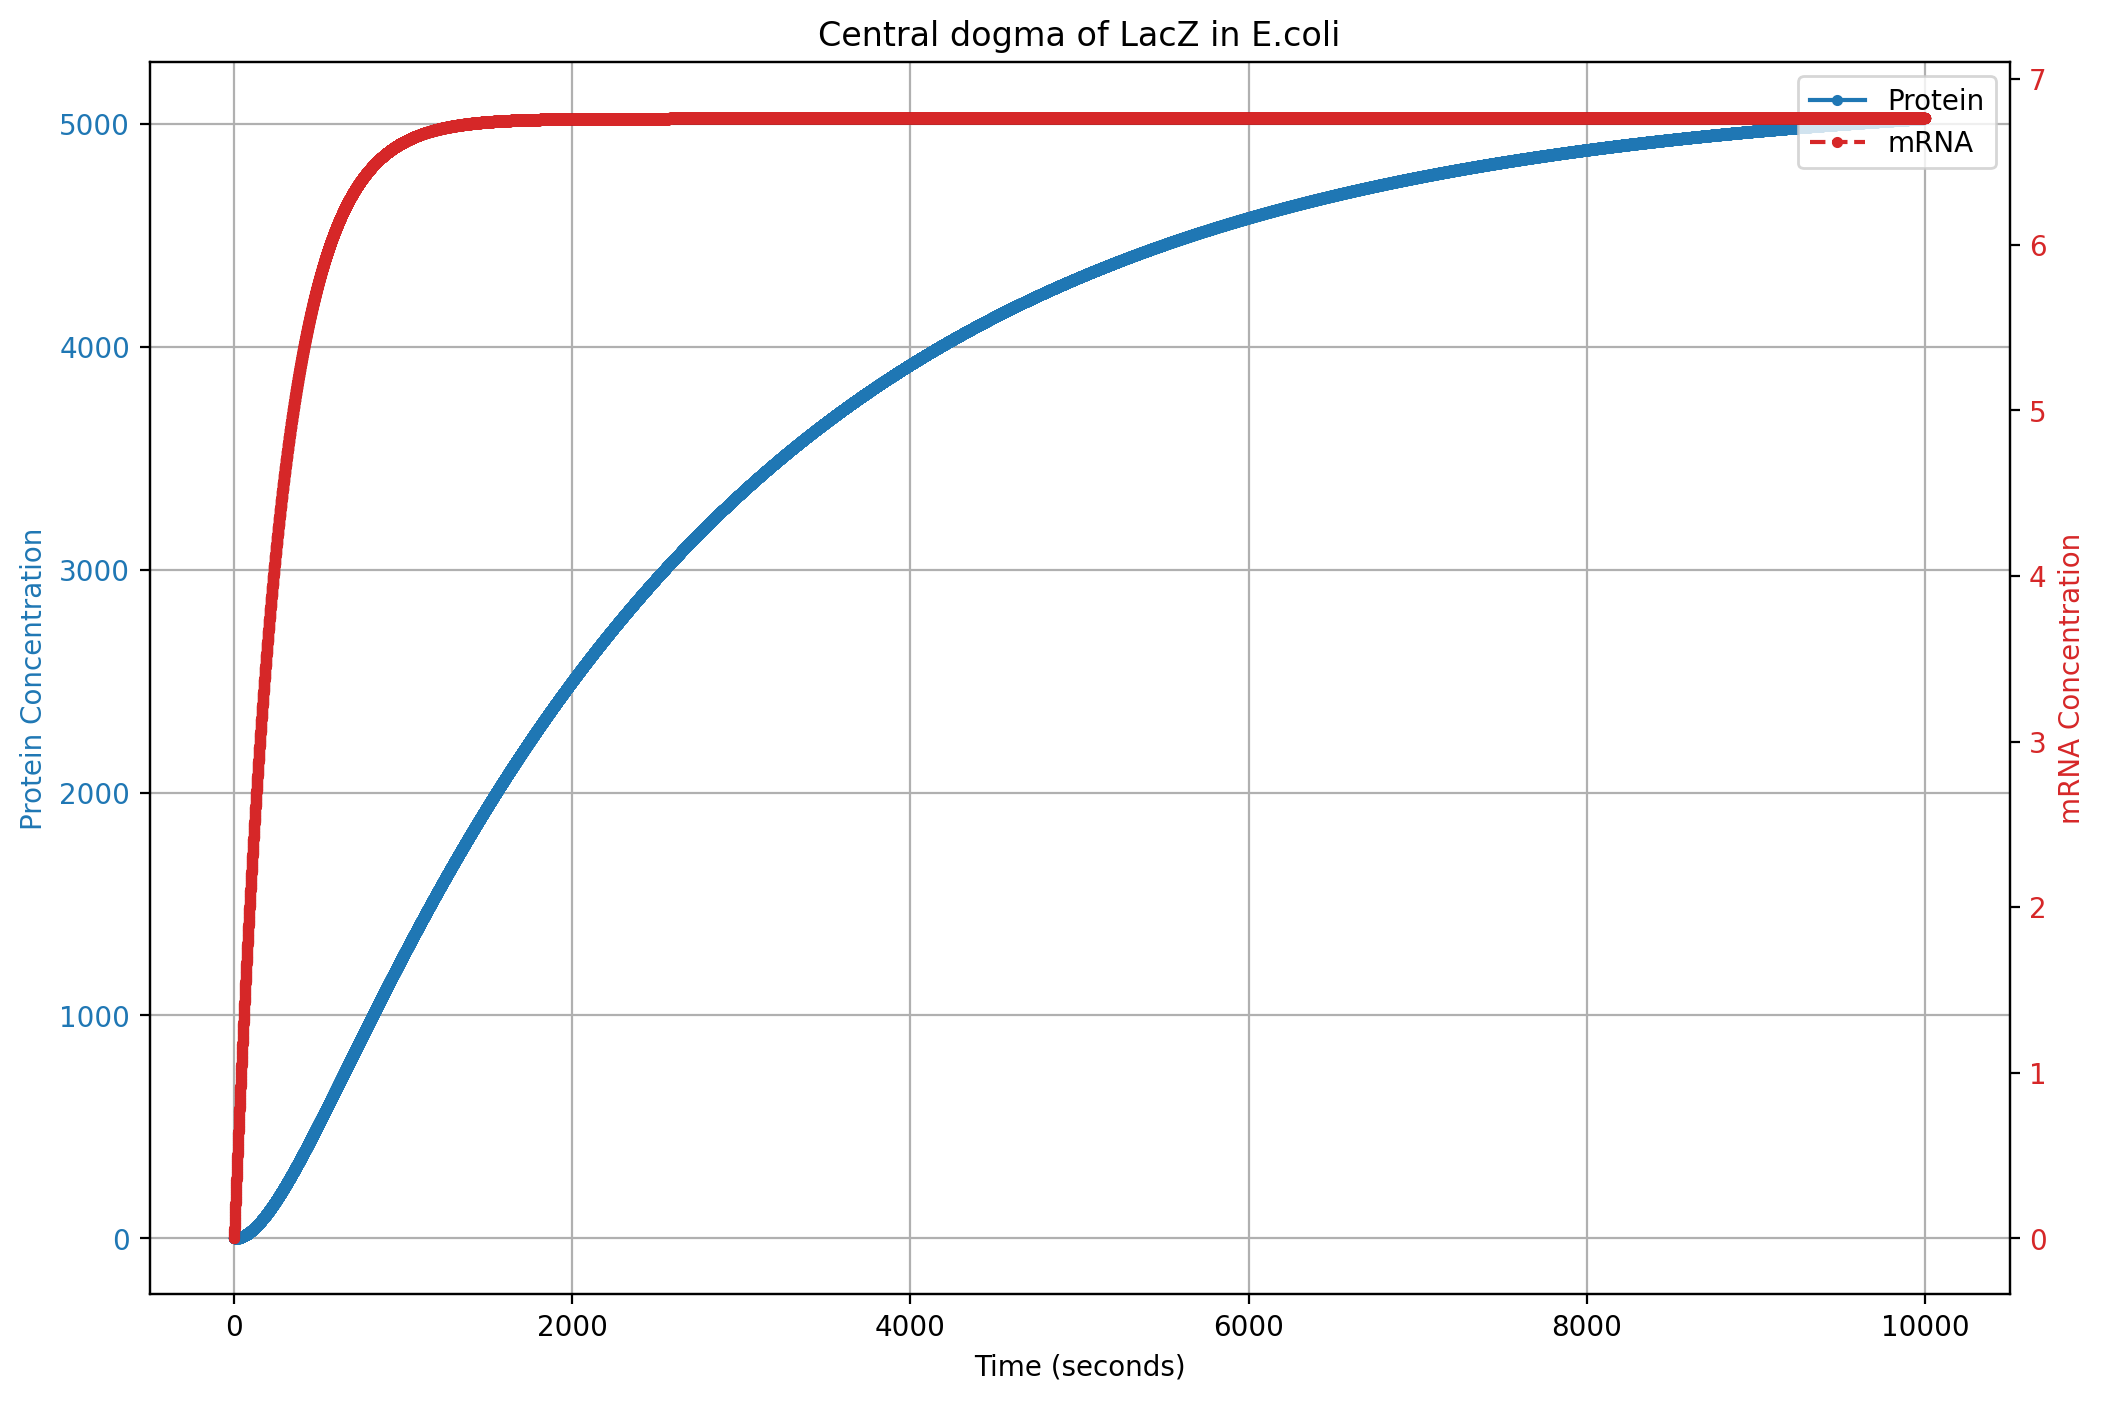

In [5]:
# Create figure and first y-axis for protein
fig, ax1 = plt.subplots(figsize=(12, 8))
color_protein = 'tab:blue'
ax1.plot(t, p, '.-', color=color_protein, label='Protein')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Protein Concentration', color=color_protein)
ax1.tick_params(axis='y', labelcolor=color_protein)
ax1.grid(True)

# Create second y-axis for mRNA
ax2 = ax1.twinx()
color_mrna = 'tab:red'
ax2.plot(t, m, '.--', color=color_mrna, label='mRNA')
ax2.set_ylabel('mRNA Concentration', color=color_mrna)
ax2.tick_params(axis='y', labelcolor=color_mrna)

# Title and legenda
plt.title('Central dogma of LacZ in E.coli')

# Set legend position
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Print steady-state values
m_ss = k/gamma
p_ss = alfa/beta * m_ss
steady_state_ratio = p_ss/m_ss  # ratio ofProteins and mRNA at the steady state
protein_per_mrna_lifetime = alfa / gamma  # Proteins produced per mRNA before degradation

print(f"Steady-state mRNA: {m_ss:.2f}")
print(f"Steady-state protein: {p_ss:.2f}")
print(f"Steady-state Protein/mRNA ratio: {steady_state_ratio:.2f}")
print(f"Proteins produced per mRNA before degradation: {protein_per_mrna_lifetime:.2f}")

plt.show()


#### Sanity Check
Note that the y-axes have different scales to correctly display both functions, which represent mRNA concentrations (in red) and protein levels (in blue) as a function of time (measured in seconds).
Studying both function, we observe that for t -> ∞, the solution approaches the steady state, as expected.

To assess whether the plot holds biological significance, let's perform a sanity check on the protein-to-mRNA ratio at steady state. By dividing the steady state of p over m, we obtain simply _α_ over _β_ . With the set values, we get approximately 760, which is consistent with the previously described protein-to-mRNA ratio of around 1000.

A second sanity check can be applied to the "Proteins produced per mRNA before degradation," which can be determined by using the ratio of _α_ over _γ_  . This yields a value of approximately 76, which is consistent with the values previously discussed of about 10-100 protein per single mRNA molecules.


## Maclaurin Series
Interestingly, for _"the mRNA"_ function, in the limit of t -> 0, the function grows asymptotically toward a straight line.
Conversly, for the _"protein"_ function, in the limit of t -> 0, the function grows asymptotically toward a parabola.
For better understanding, see Appendix B of the file named Magnati_Project_Central_Dogma.

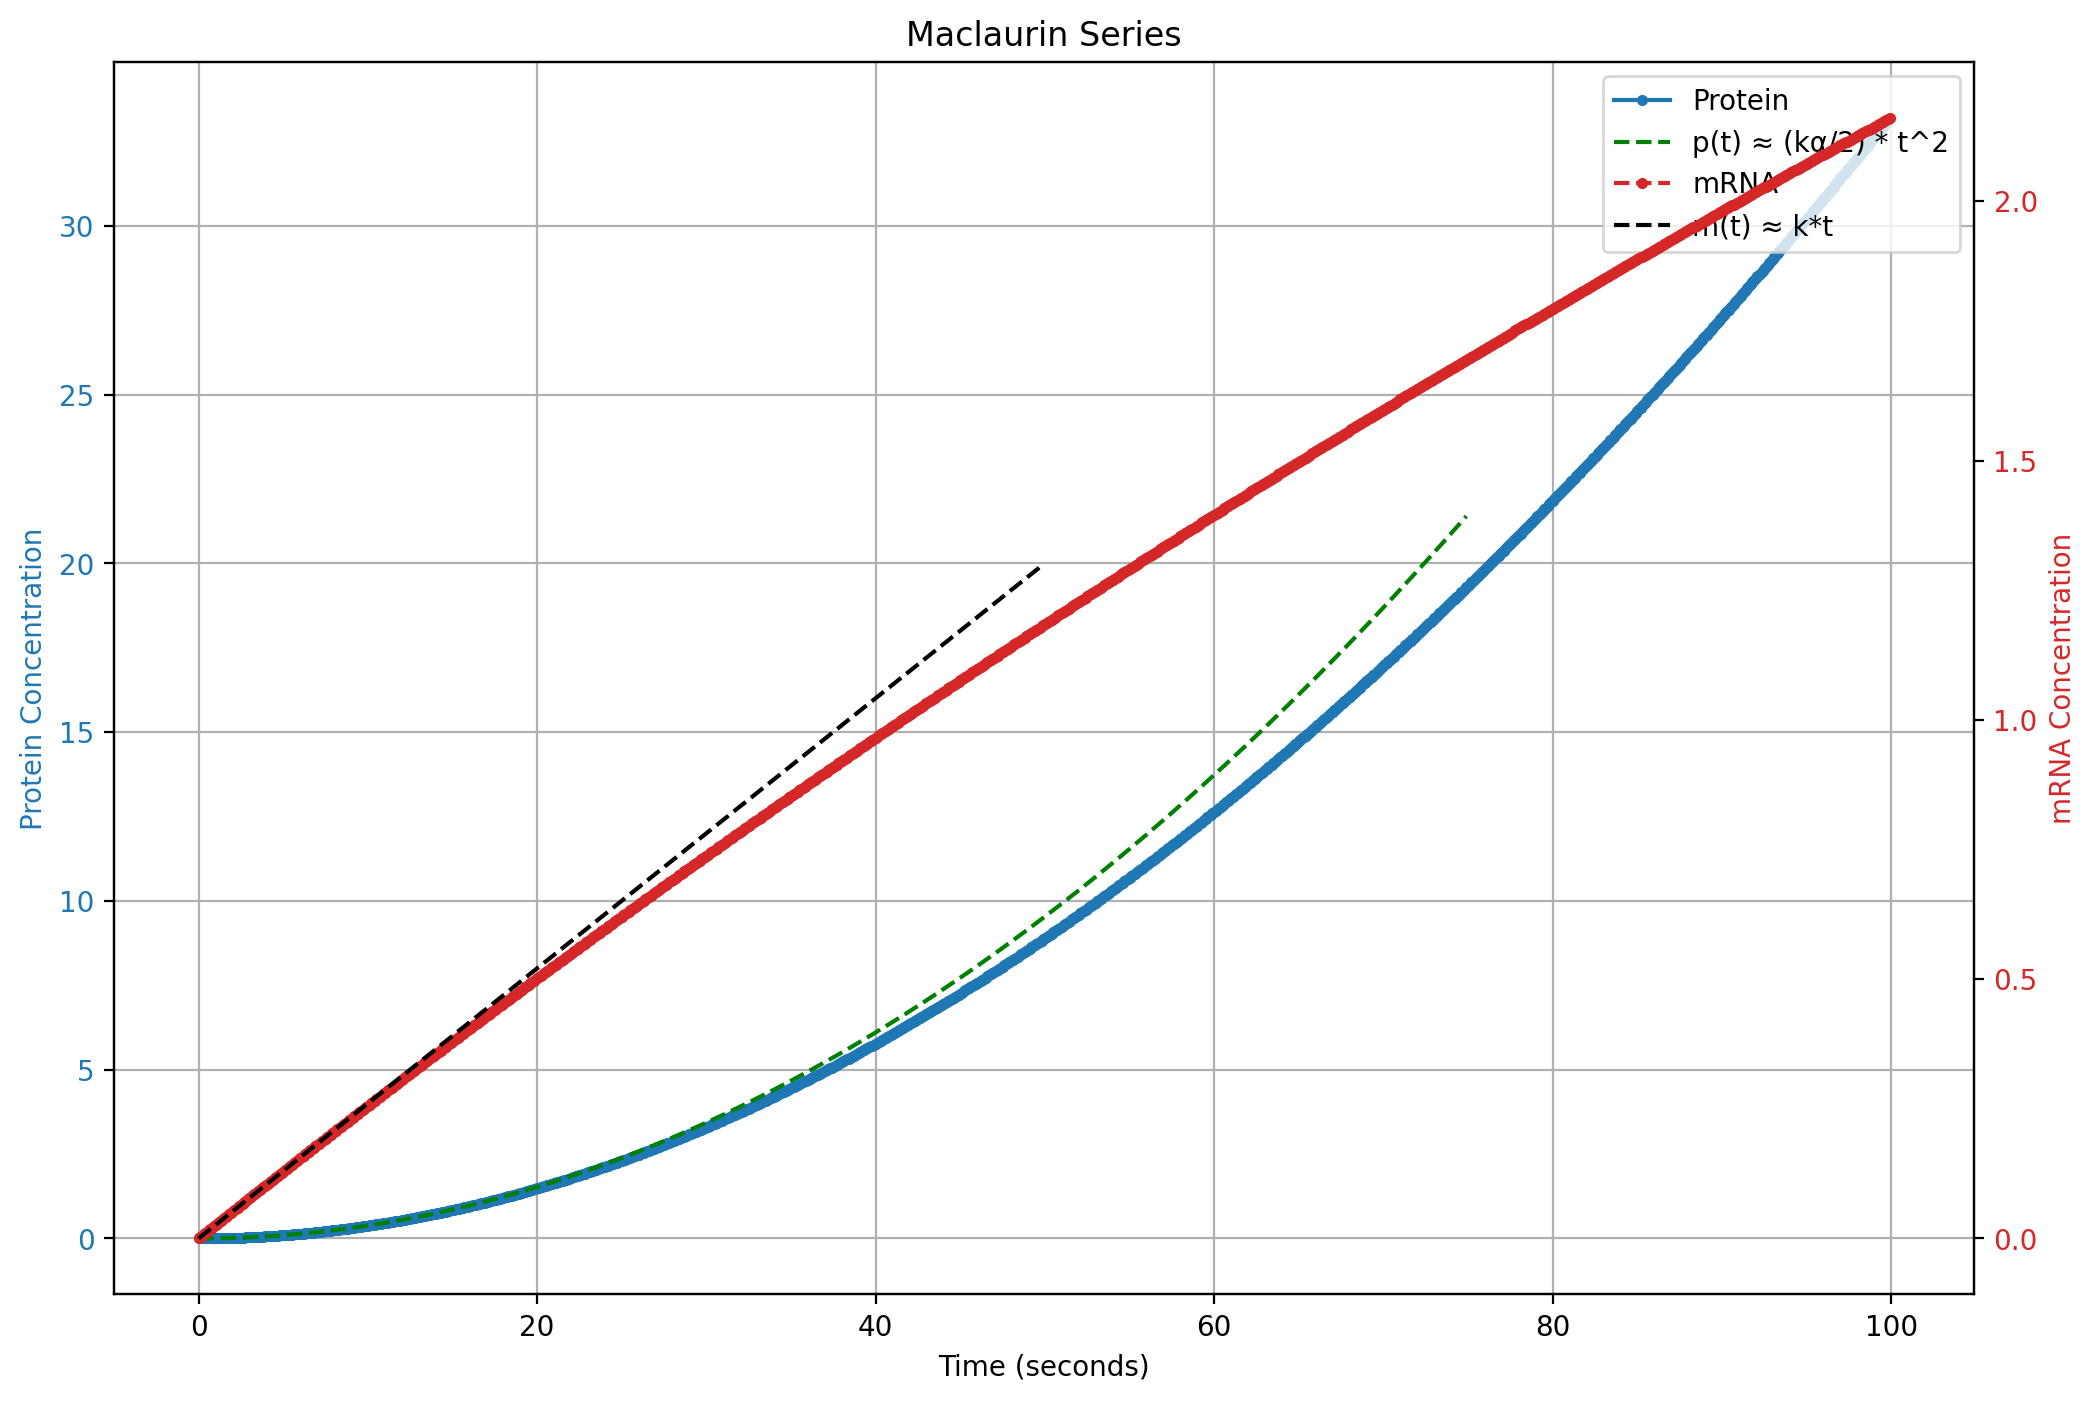

In [7]:
# Time range (reduced for better visualization of early behavior)
tmax = 100  # seconds
dt = 0.1
t_ = np.arange(0, tmax, dt)

# Compute solutions
m = k / gamma * (1 - np.exp(-gamma * t_))
p = k * alfa / gamma * (
    1 / beta * (1 - np.exp(-beta * t_)) - 
    1 / (beta - gamma) * (np.exp(-gamma * t_) - np.exp(-beta * t_))
)

# Create figure and first y-axis for protein
fig, ax1 = plt.subplots(figsize=(12, 8))
color_protein = 'tab:blue'
ax1.plot(t_, p, '.-', color=color_protein, label='Protein')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Protein Concentration', color=color_protein)
ax1.tick_params(axis='y', labelcolor=color_protein)
ax1.grid(True)

# Create second y-axis for mRNA
ax2 = ax1.twinx()
color_mrna = 'tab:red'
ax2.plot(t_, m, '.--', color=color_mrna, label='mRNA')
ax2.set_ylabel('mRNA Concentration', color=color_mrna)
ax2.tick_params(axis='y', labelcolor=color_mrna)

# Define the range for dashed lines
cutoff_mrna = 50  # Show McLaurin approximation for mRNA only for t < cutoff_mrna
cutoff_protein = 75  # Show McLaurin approximation for protein only for t < cutoff_protein
mask_mrna = t_ < cutoff_mrna
mask_protein = t_ < cutoff_protein

# Add McLaurin approximations as dashed lines with different cutoffs
ax2.plot(t_[mask_mrna], k * t_[mask_mrna], 'k--', label='m(t) ≈ k*t')
ax1.plot(t_[mask_protein], (k * alfa / 2) * t_[mask_protein]**2, 'g--', label='p(t) ≈ (kα/2) * t^2')

# Title and legend
plt.title('Maclaurin Series')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.show()

##  Interactive Plot with User-Defined Parameters
The plot dynamically updates in real-time based on various input parameters that govern transcription, translation, mRNA degradation, and the cell cycle. Users can easily adjust key parameters, including protein length, the maximum speeds of RNA polymerase and ribosomes, the number of ribosomes per mRNA, the mRNA degradation rate, and the cell cycle duration, all through interactive sliders. Each parameter has predefined limits to ensure that the values are within realistic biological ranges. By manipulating these sliders, users can visually explore how changes in each parameter influence gene expression dynamics, offering an interactive and intuitive approach to studying the central dogma and gene regulation in _E. coli_.

In [4]:
import ipywidgets as widgets
from ipywidgets import interact


def update_plot(length, max_speed_pol, max_speed_rib, rib_per_mrna, mrna_degradation, cell_cycle):
    # Compute times
    time_transcription = length * 3 / max_speed_pol  # sec
    time_translation = length / max_speed_rib  # sec

    # Define rates
    k = 1 / time_transcription
    alpha = rib_per_mrna * (1 / time_translation)  # Adjusted translation rate

    gamma = np.log(2) / mrna_degradation
    beta = np.log(2) / cell_cycle

    # Time range
    tmax = 10000  # seconds
    dt = 0.1
    t = np.arange(0, tmax, dt)

    # Compute solutions
    m = k / gamma * (1 - np.exp(-gamma * t))
    p = k * alpha / gamma * (
        1 / beta * (1 - np.exp(-beta * t)) - 
        1 / (beta - gamma) * (np.exp(-gamma * t) - np.exp(-beta * t))
    )

    # Create figure and first y-axis for protein
    fig, ax1 = plt.subplots(figsize=(12, 8))
    color_protein = 'tab:blue'
    ax1.plot(t, p, '.-', color=color_protein, label='Protein')
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('Protein Concentration', color=color_protein)
    ax1.tick_params(axis='y', labelcolor=color_protein)
    ax1.grid(True)

    # Create second y-axis for mRNA
    ax2 = ax1.twinx()
    color_mrna = 'tab:red'
    ax2.plot(t, m, '.--', color=color_mrna, label='mRNA')
    ax2.set_ylabel('mRNA Concentration', color=color_mrna)
    ax2.tick_params(axis='y', labelcolor=color_mrna)

    #title
    plt.title('Central dogma of LacZ in E.coli')

    # legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    # Print steady-state values
    steady_state_ratio = alpha / beta  # Proteine per mRNA a regime
    protein_per_mrna_lifetime = alpha / gamma  # Proteine prodotte per mRNA prima della degradazione
    print(f"Steady-state Protein/mRNA ratio: {steady_state_ratio:.2f}")
    print(f"Proteins produced per mRNA before degradation: {protein_per_mrna_lifetime:.2f}")

    plt.show()

# Create interactive widgets for the parameters
interact(update_plot, 
         length=widgets.IntSlider(value=1024, min=100, max=5000, step=1, description='Protein length'),
         max_speed_pol=widgets.FloatSlider(value=20, min=10, max=200, step=1, description='Max speed pol'),
         max_speed_rib=widgets.FloatSlider(value=20, min=5, max=80, step=1, description='Max speed rib'),
         rib_per_mrna=widgets.IntSlider(value=15, min=1, max=100, step=1, description='Ribosomes per mRNA'),
         mrna_degradation=widgets.FloatSlider(value=3 * 60, min=1 * 60, max=10 * 60, step=10, description='mRNA degradation (s)'),
         cell_cycle=widgets.FloatSlider(value=30 * 60, min=10 * 60, max=60 * 60, step=10, description='cell_cycle (s)')
)


interactive(children=(IntSlider(value=1024, description='Protein length', max=5000, min=100), FloatSlider(valu…

<function __main__.update_plot(length, max_speed_pol, max_speed_rib, rib_per_mrna, mrna_degradation, cell_cycle)>